In [1]:
pip install tensorboard pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 4.8 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.6 MB 8.1 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.6 MB 6.8 MB/s eta 0:00:02
   --------------------------- ------------ 8.1/11.6 MB 9.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 9.6 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas

In [2]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (34,) and (33,)

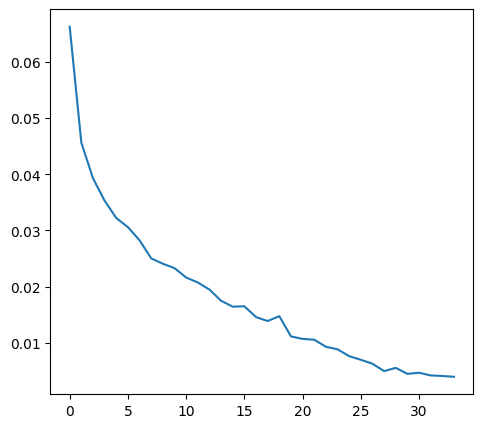

In [4]:
# 替换为你自己的 log_dir 路径
log_dir = "./logs/T16_b16_adam_lr0.001_c128_amp_cupy"


ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()

# 提取 scalars
train_loss = ea.Scalars('train_loss')
train_acc = ea.Scalars('train_acc')
test_loss = ea.Scalars('test_loss')
test_acc = ea.Scalars('test_acc')

# 转换为 numpy 数组
epochs = [x.step for x in train_loss]
train_loss = [x.value for x in train_loss]
train_acc = [x.value for x in train_acc]
test_loss = [x.value for x in test_loss]
test_acc = [x.value for x in test_acc]

# 绘图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()